In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [5]:
df = pd.read_csv('battery.csv')
df

,"Total Time, S",Cycle,Loop Counter #1,Loop Counter #2,Loop Counter #3,Step,"Step Time, S","Current, A","Voltage, V","Power, W",...,Unassigned A4,Unassigned A5,Unassigned A6,Unassigned A7,Unassigned A8,Unassigned A9,Mode,Real Time,Data Acquisition Flag,Unnamed: 40
0,10.000,1.0,1.0,1.0,1.0,1.0,10.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,REST,20/12/2021 14:25:30,,NaN
1,20.000,1.0,1.0,1.0,1.0,1.0,20.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,REST,20/12/2021 14:25:40,,NaN
2,30.000,1.0,1.0,1.0,1.0,1.0,30.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,REST,20/12/2021 14:25:50,,NaN
3,40.000,1.0,1.0,1.0,1.0,1.0,40.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,REST,20/12/2021 14:26:00,,NaN
4,50.000,1.0,1.0,1.0,1.0,1.0,50.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,REST,20/12/2021 14:26:10,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,30455.120,1.0,1.0,1.0,1.0,14.0,450.00,9.7,3.222,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,CHRG,20/12/2021 23:16:48,,NaN
3048,30465.120,1.0,1.0,1.0,1.0,14.0,460.00,9.7,3.226,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,CHRG,20/12/2021 23:16:58,,NaN
3049,30475.120,1.0,1.0,1.0,1.0,14.0,470.00,9.7,3.229,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,CHRG,20/12/2021 23:17:08,,NaN
3050,30476.970,1.0,1.0,1.0,1.0,14.0,471.85,9.7,3.230,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,CHRG,20/12/2021 23:17:10,Q,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Time, S             3052 non-null   object 
 1   Cycle                     3051 non-null   float64
 2   Loop Counter #1           3051 non-null   float64
 3   Loop Counter #2           3051 non-null   float64
 4   Loop Counter #3           3051 non-null   float64
 5   Step                      3051 non-null   float64
 6   Step Time, S              3051 non-null   float64
 7   Current, A                3051 non-null   float64
 8   Voltage, V                3051 non-null   float64
 9   Power, W                  3051 non-null   float64
 10  Instantaneous Amps, A     3051 non-null   float64
 11  Instantaneous Volts, V    3051 non-null   float64
 12  Instantaneous Watts, W    3051 non-null   float64
 13  Amp-Hours, AH             3051 non-null   float64
 14  Watt-Hou

In [7]:
df = df.iloc[:,:-3]

In [8]:
df

,"Total Time, S",Cycle,Loop Counter #1,Loop Counter #2,Loop Counter #3,Step,"Step Time, S","Current, A","Voltage, V","Power, W",...,Unassigned A1,Unassigned A2,Unassigned A3,Unassigned A4,Unassigned A5,Unassigned A6,Unassigned A7,Unassigned A8,Unassigned A9,Mode
0,10.000,1.0,1.0,1.0,1.0,1.0,10.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST
1,20.000,1.0,1.0,1.0,1.0,1.0,20.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST
2,30.000,1.0,1.0,1.0,1.0,1.0,30.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST
3,40.000,1.0,1.0,1.0,1.0,1.0,40.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST
4,50.000,1.0,1.0,1.0,1.0,1.0,50.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,30455.120,1.0,1.0,1.0,1.0,14.0,450.00,9.7,3.222,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHRG
3048,30465.120,1.0,1.0,1.0,1.0,14.0,460.00,9.7,3.226,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHRG
3049,30475.120,1.0,1.0,1.0,1.0,14.0,470.00,9.7,3.229,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHRG
3050,30476.970,1.0,1.0,1.0,1.0,14.0,471.85,9.7,3.230,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHRG


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Time, S             3052 non-null   object 
 1   Cycle                     3051 non-null   float64
 2   Loop Counter #1           3051 non-null   float64
 3   Loop Counter #2           3051 non-null   float64
 4   Loop Counter #3           3051 non-null   float64
 5   Step                      3051 non-null   float64
 6   Step Time, S              3051 non-null   float64
 7   Current, A                3051 non-null   float64
 8   Voltage, V                3051 non-null   float64
 9   Power, W                  3051 non-null   float64
 10  Instantaneous Amps, A     3051 non-null   float64
 11  Instantaneous Volts, V    3051 non-null   float64
 12  Instantaneous Watts, W    3051 non-null   float64
 13  Amp-Hours, AH             3051 non-null   float64
 14  Watt-Hou

In [10]:
df = df.drop(['Unassigned A1', 'Unassigned A2', 'Unassigned A3', 'Unassigned A4', 'Unassigned A5', 'Unassigned A6', 'Unassigned A7', 'Unassigned A8', 'Unassigned A9'], axis=1)

In [11]:
df

,"Total Time, S",Cycle,Loop Counter #1,Loop Counter #2,Loop Counter #3,Step,"Step Time, S","Current, A","Voltage, V","Power, W",...,User Variable #1,User Variable #2,User Variable #3,User Variable #4,User Variable #5,User Variable #6,User Variable #7,User Variable #8,"Temperature A1, degC",Mode
0,10.000,1.0,1.0,1.0,1.0,1.0,10.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,REST
1,20.000,1.0,1.0,1.0,1.0,1.0,20.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,REST
2,30.000,1.0,1.0,1.0,1.0,1.0,30.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,REST
3,40.000,1.0,1.0,1.0,1.0,1.0,40.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,REST
4,50.000,1.0,1.0,1.0,1.0,1.0,50.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,REST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,30455.120,1.0,1.0,1.0,1.0,14.0,450.00,9.7,3.222,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,CHRG
3048,30465.120,1.0,1.0,1.0,1.0,14.0,460.00,9.7,3.226,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,CHRG
3049,30475.120,1.0,1.0,1.0,1.0,14.0,470.00,9.7,3.229,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,CHRG
3050,30476.970,1.0,1.0,1.0,1.0,14.0,471.85,9.7,3.230,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,CHRG


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Time, S             3052 non-null   object 
 1   Cycle                     3051 non-null   float64
 2   Loop Counter #1           3051 non-null   float64
 3   Loop Counter #2           3051 non-null   float64
 4   Loop Counter #3           3051 non-null   float64
 5   Step                      3051 non-null   float64
 6   Step Time, S              3051 non-null   float64
 7   Current, A                3051 non-null   float64
 8   Voltage, V                3051 non-null   float64
 9   Power, W                  3051 non-null   float64
 10  Instantaneous Amps, A     3051 non-null   float64
 11  Instantaneous Volts, V    3051 non-null   float64
 12  Instantaneous Watts, W    3051 non-null   float64
 13  Amp-Hours, AH             3051 non-null   float64
 14  Watt-Hou

In [13]:
if 'Mode' in df.columns:
    label_encoder = LabelEncoder()
    df['Mode'] = label_encoder.fit_transform(df['Mode'])

In [14]:
df.dropna(inplace=True)

In [15]:
df

,"Total Time, S",Cycle,Loop Counter #1,Loop Counter #2,Loop Counter #3,Step,"Step Time, S","Current, A","Voltage, V","Power, W",...,User Variable #1,User Variable #2,User Variable #3,User Variable #4,User Variable #5,User Variable #6,User Variable #7,User Variable #8,"Temperature A1, degC",Mode
0,10.000,1.0,1.0,1.0,1.0,1.0,10.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,2
1,20.000,1.0,1.0,1.0,1.0,1.0,20.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,2
2,30.000,1.0,1.0,1.0,1.0,1.0,30.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,2
3,40.000,1.0,1.0,1.0,1.0,1.0,40.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,2
4,50.000,1.0,1.0,1.0,1.0,1.0,50.00,0.0,3.288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,30445.120,1.0,1.0,1.0,1.0,14.0,440.00,9.7,3.218,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,0
3047,30455.120,1.0,1.0,1.0,1.0,14.0,450.00,9.7,3.222,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,0
3048,30465.120,1.0,1.0,1.0,1.0,14.0,460.00,9.7,3.226,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,0
3049,30475.120,1.0,1.0,1.0,1.0,14.0,470.00,9.7,3.229,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.4,0


In [16]:
features = ['Voltage, V', 'Current, A', 'Power, W', 'Amp-Hours, AH',
            'Amp Hours Charge, AH', 'Amp Hours Discharge, AH',
            'Watt Hours Charge, WH', 'Watt Hours Discharge, WH', 'Temperature A1, degC']
X = df[features]
y_soc = df['Amp Hours Charge, AH']  
y_soh = df['Watt Hours Discharge, WH']  
y_mode = df['Mode']

In [17]:
X_train, X_test, y_soc_train, y_soc_test = train_test_split(X, y_soc, test_size=0.2, random_state=42)
X_train, X_test, y_soh_train, y_soh_test = train_test_split(X, y_soh, test_size=0.2, random_state=42)
X_train, X_test, y_mode_train, y_mode_test = train_test_split(X, y_mode, test_size=0.2, random_state=42)

In [18]:
X_train

,"Voltage, V","Current, A","Power, W","Amp-Hours, AH","Amp Hours Charge, AH","Amp Hours Discharge, AH","Watt Hours Charge, WH","Watt Hours Discharge, WH","Temperature A1, degC"
351,3.402,9.7,32.0,7.86,7.86,0.00,25.95,0.00,25.4
1036,3.244,9.7,31.0,1.50,12.20,-19.81,40.19,-61.64,25.8
2726,3.434,9.7,33.0,18.26,48.74,-39.65,160.39,-122.53,25.4
889,2.869,-19.3,-55.0,-18.17,10.69,-18.17,35.62,-57.43,26.7
1929,3.096,-38.6,-119.0,-13.61,30.48,-33.43,100.59,-104.84,27.0
...,...,...,...,...,...,...,...,...,...
1638,3.417,9.7,33.0,17.72,28.42,-19.81,93.55,-61.64,25.5
1095,3.275,9.7,31.0,3.09,13.79,-19.81,45.27,-61.64,25.6
1130,3.301,9.7,32.0,4.04,14.73,-19.81,48.30,-61.64,25.5
1294,3.347,9.7,32.0,8.46,19.15,-19.81,62.87,-61.64,25.4


In [23]:
X_test

,"Voltage, V","Current, A","Power, W","Amp-Hours, AH","Amp Hours Charge, AH","Amp Hours Discharge, AH","Watt Hours Charge, WH","Watt Hours Discharge, WH","Temperature A1, degC"
270,3.386,9.7,32.0,5.68,5.68,0.00,18.75,0.00,25.4
544,3.415,0.0,0.0,0.00,10.69,0.00,35.62,0.00,25.0
2494,3.362,9.7,32.0,12.01,42.49,-39.65,139.61,-122.53,25.5
554,3.300,-19.3,-63.0,-0.21,10.69,-0.21,35.62,-0.70,25.0
2322,3.342,9.7,32.0,7.38,37.86,-39.65,124.33,-122.53,25.5
...,...,...,...,...,...,...,...,...,...
367,3.408,9.7,33.0,8.29,8.29,0.00,27.42,0.00,25.4
847,3.083,-19.3,-59.0,-15.92,10.69,-15.92,35.62,-50.74,26.1
2313,3.342,9.7,32.0,7.14,37.62,-39.65,123.53,-122.53,25.5
2921,2.924,-96.5,-282.0,-14.20,50.21,-53.86,165.41,-165.95,32.1


In [34]:
y_soc_train

351      7.86
1036    12.20
2726    48.74
889     10.69
1929    30.48
        ...  
1638    28.42
1095    13.79
1130    14.73
1294    19.15
860     10.69
Name: Amp Hours Charge, AH, Length: 2440, dtype: float64

In [37]:
y_soc_test

270      5.68
544     10.69
2494    42.49
554     10.69
2322    37.86
        ...  
367      8.29
847     10.69
2313    37.62
2921    50.21
1370    21.20
Name: Amp Hours Charge, AH, Length: 611, dtype: float64

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[ 0.58363313,  0.52390793,  0.5390052 , ..., -1.12104107,
         1.44868885, -0.42187929],
       [-0.08205004,  0.52390793,  0.52317824, ..., -0.83848571,
         0.23261078, -0.17196779],
       [ 0.71845504,  0.52390793,  0.55483216, ...,  1.5465672 ,
        -0.96867075, -0.42187929],
       ...,
       [ 0.15810148,  0.52390793,  0.5390052 , ..., -0.67756409,
         0.23261078, -0.35940141],
       [ 0.35190797,  0.52390793,  0.5390052 , ..., -0.38846075,
         0.23261078, -0.42187929],
       [-0.92890016, -0.87098255, -0.88542098, ..., -0.92916534,
         0.40582891,  0.14042158]])

In [44]:
X_test

array([[ 0.51622218,  0.52390793,  0.5390052 , ..., -1.26390613,
         1.44868885, -0.42187929],
       [ 0.63840453,  0.05734112,  0.03254256, ..., -0.92916534,
         1.44868885, -0.67179079],
       [ 0.41510574,  0.52390793,  0.5390052 , ...,  1.13424275,
        -0.96867075, -0.35940141],
       ...,
       [ 0.33084205,  0.52390793,  0.5390052 , ...,  0.81517743,
        -0.96867075, -0.35940141],
       [-1.43026913, -4.5842772 , -4.43065946, ...,  1.6461759 ,
        -1.82529161,  3.76413832],
       [ 0.38561345,  0.52390793,  0.5390052 , ..., -0.25432633,
         0.23261078, -0.35940141]])

In [46]:
model_soc = RandomForestRegressor(n_estimators=100, random_state=42)
model_soc.fit(X_train, y_soc_train)
pred_soc = model_soc.predict(X_test)

In [47]:
pred_soc

array([ 5.6735, 10.69  , 42.476 , 10.69  , 37.8569,  7.366 , 45.2178,
       38.7351,  9.7893, 23.3143, 39.4009, 48.2705,  5.0488, 40.0904,
       10.69  , 30.48  , 10.69  ,  0.0936,  3.5654, 10.69  , 30.48  ,
       30.48  , 48.136 ,  6.1805, 10.69  ,  3.2113, 31.4946, 26.2323,
       30.48  , 48.0375, 10.69  , 10.69  , 30.48  ,  7.9267, 10.69  ,
       50.21  , 48.3743, 11.2033, 42.991 , 41.6141, 30.48  , 26.7933,
       40.6561, 37.2114, 15.5514, 30.48  ,  7.0993, 32.3937,  5.1506,
       10.3394, 50.1863,  8.3303,  6.2443,  0.    , 10.4127, 40.4717,
       21.9967, 24.3794, 30.48  , 50.0041, 10.69  , 10.69  ,  0.    ,
       10.6418,  2.423 , 10.69  , 50.21  , 51.2976, 40.3671, 36.4568,
       10.69  , 10.69  , 44.969 ,  6.4217,  1.1477, 11.907 , 40.5236,
        7.7433, 26.4366, 26.1902, 19.3042,  3.3808, 47.6377, 50.21  ,
        8.3881,  6.8716, 10.69  ,  5.2356, 30.48  , 23.4258, 51.2695,
       22.7702, 50.21  , 10.69  , 12.4145,  0.    , 17.384 ,  2.147 ,
       10.69  , 43.9

In [48]:
y_soc_test

270      5.68
544     10.69
2494    42.49
554     10.69
2322    37.86
        ...  
367      8.29
847     10.69
2313    37.62
2921    50.21
1370    21.20
Name: Amp Hours Charge, AH, Length: 611, dtype: float64

In [52]:
model_soh = RandomForestRegressor(n_estimators=100, random_state=42)
model_soh.fit(X_train, y_soh_train)
pred_soh = model_soh.predict(X_test)

In [53]:
pred_soh

array([   0.    ,    0.    , -122.53  ,   -0.6332, -122.53  ,    0.    ,
       -122.53  , -122.53  ,    0.    ,  -61.64  , -122.53  , -122.53  ,
          0.    , -122.53  ,    0.    ,  -61.64  ,   -7.7304,    0.    ,
          0.    ,  -36.3366,  -61.64  , -122.53  , -122.53  ,    0.    ,
         -8.6282,    0.    , -122.53  ,  -61.64  ,  -62.7418, -122.53  ,
        -30.5765,  -56.2047,  -94.5676,    0.    ,  -17.3021, -181.03  ,
       -122.53  ,  -61.64  , -122.53  , -122.53  ,  -69.6194,  -61.64  ,
       -122.53  , -122.53  ,  -61.64  , -122.53  ,    0.    , -122.53  ,
          0.    ,    0.    , -122.53  ,    0.    ,    0.    ,    0.    ,
          0.    , -122.53  ,  -61.64  ,  -61.64  ,  -61.64  , -122.53  ,
        -54.4141,  -22.9498,    0.    ,    0.    ,    0.    ,   -5.5145,
       -157.8912, -181.03  , -122.53  , -122.53  ,  -54.0327,  -45.6801,
       -122.53  ,    0.    ,    0.    ,  -61.64  , -122.53  ,    0.    ,
        -61.64  ,  -61.64  ,  -61.64  ,    0.    , 

In [54]:
y_soh_test

270       0.00
544       0.00
2494   -122.53
554      -0.70
2322   -122.53
         ...  
367       0.00
847     -50.74
2313   -122.53
2921   -165.95
1370    -61.64
Name: Watt Hours Discharge, WH, Length: 611, dtype: float64

In [66]:
pred_mode

array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [68]:
y_mode_test

270     0
544     2
2494    0
554     1
2322    0
       ..
367     0
847     1
2313    0
2921    1
1370    0
Name: Mode, Length: 611, dtype: int32

In [58]:
model_mode = RandomForestClassifier(n_estimators=100, random_state=42)
model_mode.fit(X_train, y_mode_train)
pred_mode = model_mode.predict(X_test)

In [60]:
def evaluate_model(y_true, y_pred, name):
    print(f"{name} Prediction Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print("------------------------------")

evaluate_model(y_soc_test, pred_soc, "State of Charge (SoC)")
evaluate_model(y_soh_test, pred_soh, "State of Health (SoH)")

State of Charge (SoC) Prediction Performance:
MAE: 0.008500163666129216
MSE: 0.00018312291325694416
R² Score: 0.9999992288620735
------------------------------
State of Health (SoH) Prediction Performance:
MAE: 0.022330605564881194
MSE: 0.0056799011783959285
R² Score: 0.9999978030207518
------------------------------


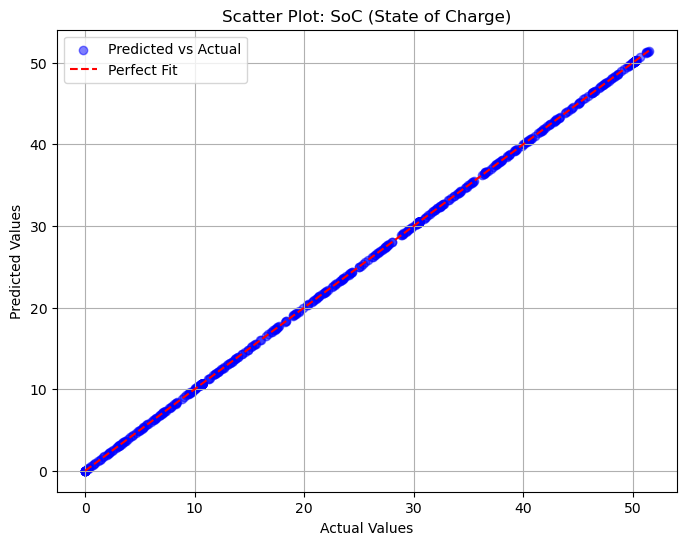

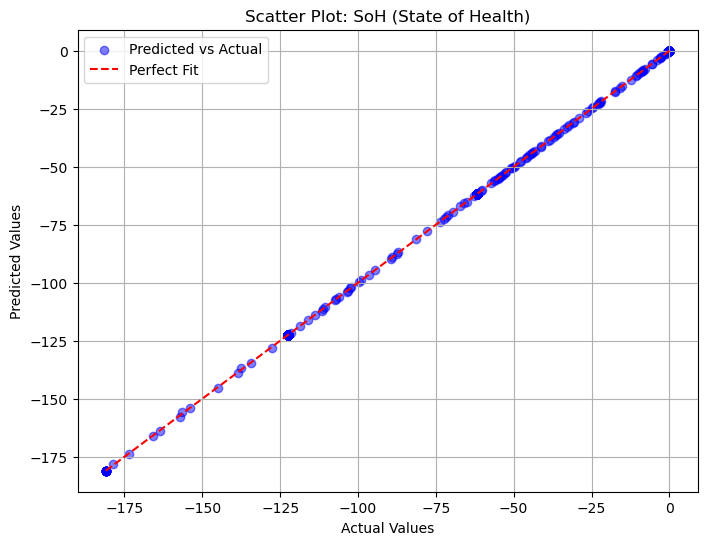

In [62]:
def plot_scatter(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label="Perfect Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)

plot_scatter(y_soc_test, pred_soc, "Scatter Plot: SoC (State of Charge)")
plot_scatter(y_soh_test, pred_soh, "Scatter Plot: SoH (State of Health)")

In [64]:
print("Mode Prediction Performance:")
print("Accuracy:", accuracy_score(y_mode_test, pred_mode))
print("------------------------------")


Mode Prediction Performance:
Accuracy: 1.0
------------------------------
